<a href="https://colab.research.google.com/github/nctamer/MUSC_violin/blob/main/demo_violin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
w_dir = '/content/drive/MyDrive/PhD/data/ISMIR23/youtube_inference/ismir_model'
# change it with the folder I shared with you

synth_inside_colab = False # we need so many packages for fluidsynth! better not

In [ ]:
#@markdown Import modules
import os, sys
!pip install mir_eval &> /dev/null
!pip install pretty_midi &> /dev/null
!pip install yt-dlp &> /dev/null
if synth_inside_colab: # do not do it unless necessary
  !apt install fluidsynth &> /dev/null
  !pip install pyfluidsynth &> /dev/null
sys.path.append(w_dir)
import torch
import json
from yt_dlp import YoutubeDL
from tape.representations import PerformanceLabel
from tape.model import FourHeads as Model

In [ ]:
os.listdir(os.path.join(w_dir, 'models'))

['0403_19_iter2_parallel', '0424_09_parallel']

In [ ]:
model_folder = '0403_19_iter2_parallel' # choose among options listed above

# High Resolution Violin Transcription with Weak Labels and Pseudo Ground Truth

Transcribing a violin performance is a difficult problem that involves detecting not only the notes that are played, but also the subtle variations in pitch such as vibrato and intonation. Existing deep learning methods for music transcription are not able to capture these variations in detail and often need a lot of labeled data to train. In this paper, we propose a novel method for fine-grained violin transcription that leverages only weak supervision from piece-level labels together with pseudo ground-truth from an automatically labeled dataset. Our conformer-based model works on raw audio waveform and can detect polyphonic violin note events and their corresponding pitch deviations with 5.8 ms frame resolution and 10 cents frequency resolution. We demonstrate that our method (1) achieves state-of-the-art results in violin transcription and pitch estimation tasks; and (2) can generate new training data for itself by aligning its feature representations with new scores. We share our model and 34 hours of violin performance dataset with scores aligned by it.

In [ ]:
#@markdown Load the model


checkpoint = os.path.join(w_dir, 'models', model_folder)
with open(os.path.join(checkpoint, "args.json"), "r") as f:
    args = json.load(f)
args['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'
labeling = PerformanceLabel(note_min=args['note_low'], note_max=args['note_high'],
                            f0_bins_per_semitone=args['f0_bins_per_semitone'],
                            f0_tolerance_c=200,
                            f0_smooth_std_c=args['f0_smooth_std_c'], onset_smooth_std=args['onset_smooth_std'])

violin = Model(pathway_multiscale=args['pathway_multiscale'],
              num_pathway_layers=args['num_pathway_layers'], wiring=args['wiring'],
              #num_seperator_layers=args['num_seperator_layers'],
              hop_length=args['hop_length'], chunk_size=args['chunk_size'],
              labeling=labeling, sr=args['sampling_rate']).to(args['device'])
violin.load_state_dict(torch.load(os.path.join(checkpoint, 'model.pt'), map_location=args['device']))
violin = violin.eval()
print('loaded model from checkpoint', checkpoint)

hop in samples: 256
main stream window: 131964 , attendant stream window: 136015 , conformer input dim: 256
main frame overlap: [574, 574] , attendant frame overlap: [2599, 2600]
crop for main pathway [2025, -2026]
Total sequence duration is 136015 samples
Main stream receptive field for one frame is 1148 samples
Attendant stream receptive field for one frame is 5199 samples
Total parameter count:  54580722
loaded model from checkpoint /content/drive/MyDrive/PhD/data/ISMIR23/youtube_inference/ismir_model/models/0403_19_iter2_parallel


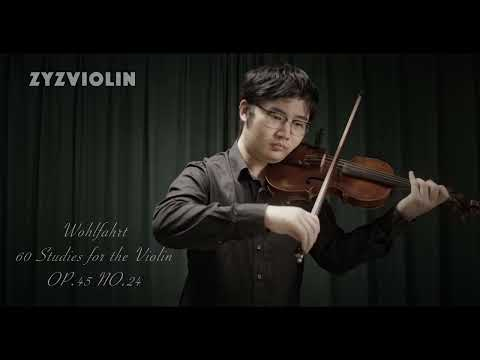

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=ul6mJbNEA9A']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(id+'.midi')
    files.download(id+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!

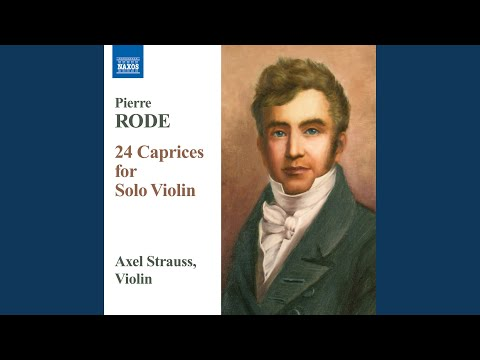

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=BzvLP3wEp48']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(title+'.midi')
    files.download(title+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!


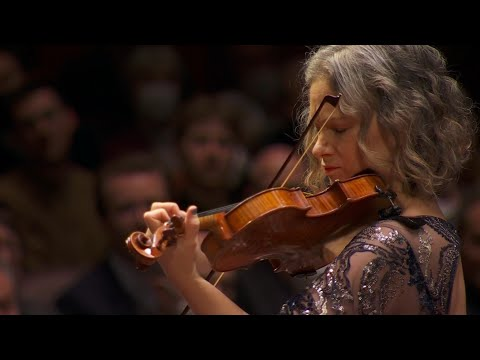

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

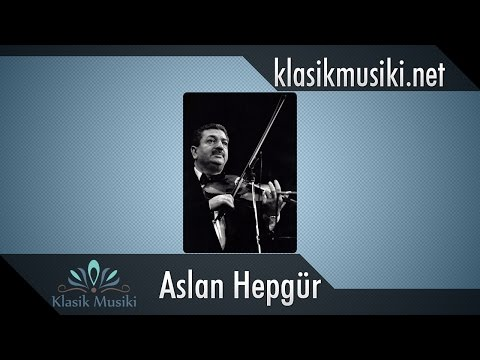

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

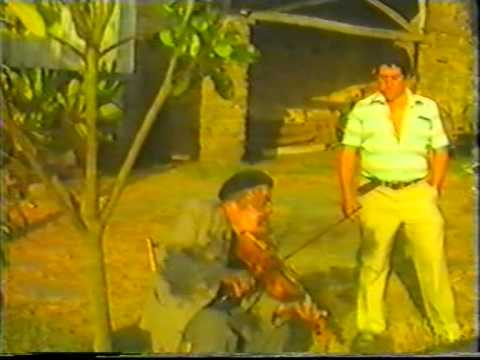

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

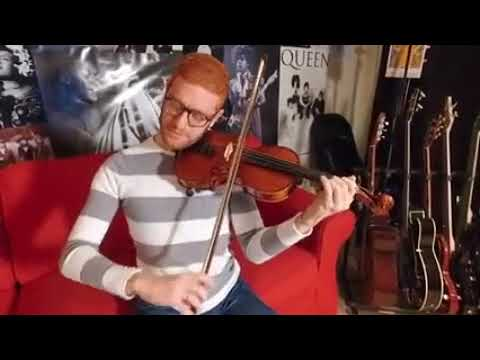

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

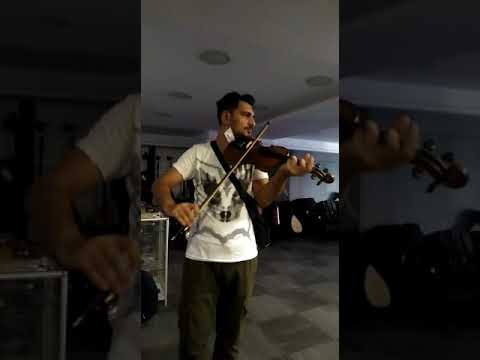

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=4iYv_n6MI8g',
            'https://www.youtube.com/watch?v=XbH0lEOIUy8',
            'https://www.youtube.com/watch?v=Wve9s4Vrn_M',
            'https://www.youtube.com/watch?v=0xbrFAdhbgY',
            'https://www.youtube.com/watch?v=Y_rHaPwxhjI']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))
    if synth_inside_colab:
      display(Audio(midi.fluidsynth(22050), rate=22050))
    else:
      midi.write(title+'.midi')
      files.download(title+'.midi') # important! your browser might block
      # downloading multiple files automatically! please look at your urlbar!!


New for the examples

Polyphonic

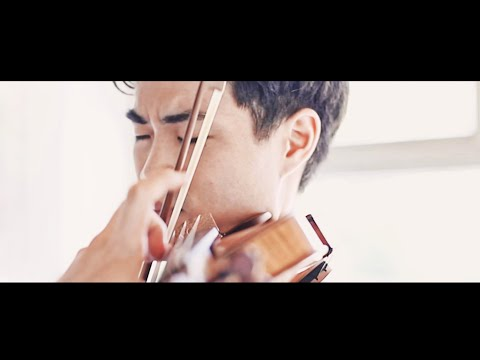

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=rdEwr9w55OY']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(title+'.midi')
    files.download(title+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!


Ethnomusicology

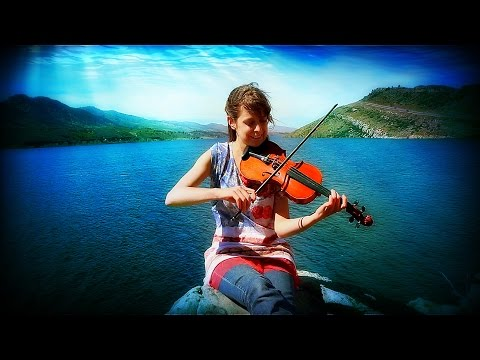

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

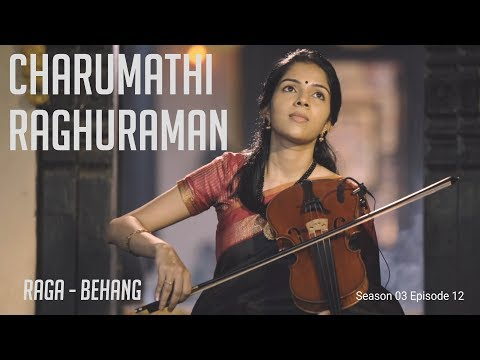

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=2ZxAVUsuE4Y',
            'https://www.youtube.com/watch?v=ESEJ1BdOVnM']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(title+'.midi')
    files.download(title+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!


RONI

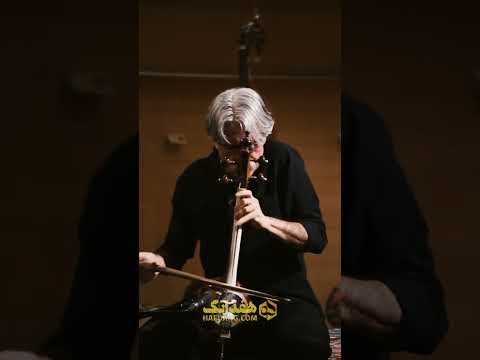

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/shorts/vhBVU-VQpjs']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(title+'.midi')
    files.download(title+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!


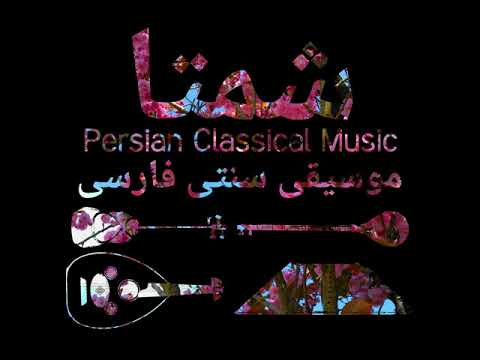

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

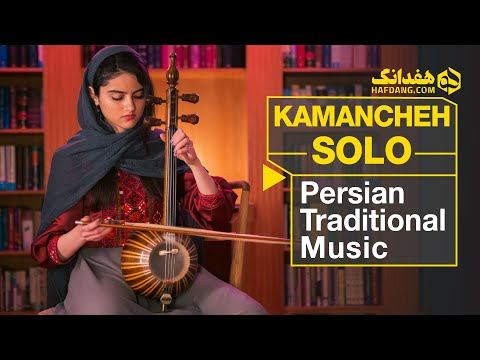

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

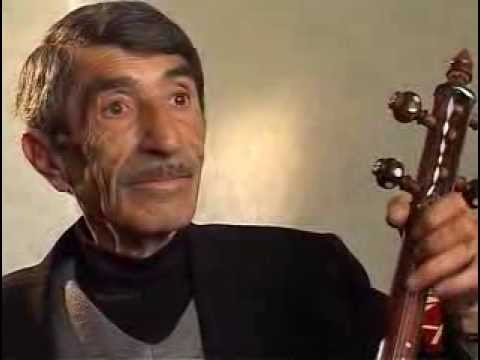

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/shorts/9VIZpFn0AaI',
            'https://www.youtube.com/watch?v=_9082acB3wk',
            'https://www.youtube.com/watch?v=bR_QXt1ft6E']:

    midi, id, title = violin.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(title+'.midi')
    files.download(title+'.midi') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!
